In [97]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/balbi/Downloads/pyMorfologik-master'))
if module_path not in sys.path:
    sys.path.append(module_path)
from pymorfologik import Morfologik
from pymorfologik.parsing import ListParser

import numpy as np
from __future__ import print_function
import string

import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
result_df = pd.read_csv('opineo-productsReviews-analisis.csv')
result_df = result_df.reset_index()
result_df.loc[result_df.detectedEmotion == 'neutral', 'detectedEmotion'] = "negative"
result_df['correct_guess'] = result_df['detectedEmotion'] == result_df['emotion']

In [147]:
def get_length(text):
    return len(text)

def get_length_bin(length):
    return round(length / 50)

def get_score(result):
    return 1 if result else 0

def prepereDataForPlot(result_df):
    result_df['score'] = map(get_score, result_df['correct_guess'])
    #create group with 10 elements
    result_df['text_length_bin'] = map(get_length_bin, result_df['words'])    
    return result_df

In [150]:
def createPlotTextLength(result_df):
    # data to plot
    n_groups = round(result_df['text_length_bin'].max())
    
    grouped = result_df.groupby('text_length_bin', as_index=False).mean()
    sum_elements = grouped.words
    means_words = grouped.words/sum_elements
    means_lemmatisation = grouped.wordsAfterLemmatisation/sum_elements
    means_emotions = grouped.wordsFound/sum_elements

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(grouped))
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Lenght of text')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index, (0, 50, 100, 150, 200, 250, 300, 350, 400, 450))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [125]:
def createPlotRates(result_df):
    # data to plot
    result_df = result_df.round({'rate': 0})
    n_groups = result_df.rate.max()
    
    grouped = result_df.groupby('rate', as_index=False).mean()
    means_words = grouped.words/grouped.words
    means_lemmatisation = grouped.wordsAfterLemmatisation/grouped.words
    means_emotions = grouped.wordsFound/grouped.words

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(grouped))
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Rates')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index, ('1', '2', '3', '4', '5'))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [126]:
def createPlotByScore(data):
    grouped = data.groupby('words', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.words
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Lenght of text')
    plt.ylabel('Efficacy')
    
    fig.show()

In [127]:
#zaleznosc oceny od wykrytej emocji
def createPlotByRate(data):
    data = data.round({'rate': 0})   
    grouped = data.groupby('rate', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.rate
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Rate')
    plt.ylabel('Efficacy')

    fig.show()

In [128]:
def createPlotByWordsFound(result):
    grouped = result.groupby('wordsFound', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.wordsFound
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)

    plt.xlabel('Found words in Slowosiec')
    plt.ylabel('Efficacy')
    
    fig.show()

In [129]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [130]:
def getResults(result_df):
    return result_df.groupby('correct_guess').size()

In [131]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

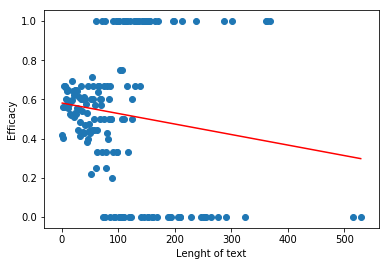

In [135]:
createPlotByScore(result_df)

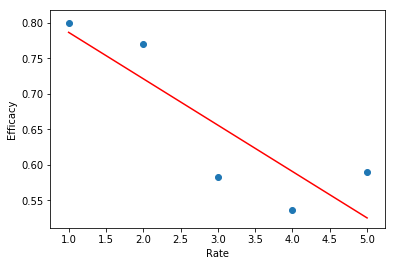

In [136]:
createPlotByRate(result_df)

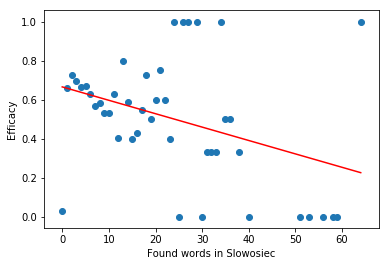

In [137]:
createPlotByWordsFound(result_df)

In [133]:
getResults(result_df)

correct_guess
False    2697
True     3614
dtype: int64

In [148]:
result_df = prepereDataForPlot(result_df)

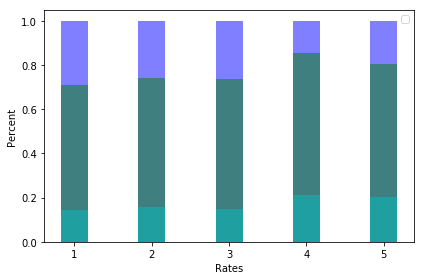

In [145]:
createPlotRates(result_df)

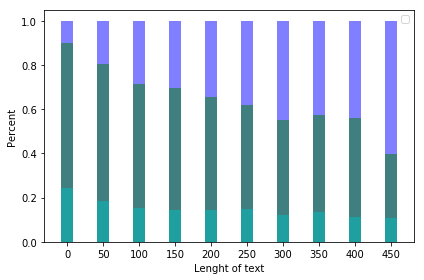

In [151]:
createPlotTextLength(result_df)

In [152]:
def devide(number):
    return number/2

def moreThenHalf(result_df):
    result_df['half_wordsAfterLemmatisation'] = map(devide, result_df['wordsAfterLemmatisation'])
    result_df['moreThenHalf'] = 0
    result_df['moreThenHalf'] = np.where(((result_df['wordsFound'] >= result_df['half_wordsAfterLemmatisation']) & (result_df['half_wordsAfterLemmatisation'] > 0) & (result_df['wordsFound'] > 0)), 1 , 0)
    return result_df

In [153]:
tym = moreThenHalf(result_df)
tym.groupby('moreThenHalf').size()
review_less = tym.loc[tym['moreThenHalf'] == 1]
review_less['correct_guess'] = review_less['detectedEmotion'] == review_less['emotion']
review_less.groupby('correct_guess').size()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


correct_guess
False    247
True     865
dtype: int64

In [154]:
result = result_df.round({'rate': 0})
grouped = result.groupby('rate', as_index=False).mean()

In [155]:
grouped

,rate,index,resultOfDetecting,words,wordsAfterLemmatisation,wordsFound,correct_guess,score,text_length_bin,half_wordsAfterLemmatisation,moreThenHalf
0,1.0,4075.160000,-0.039948,49.346667,35.026667,7.066667,0.800000,0.800000,1.000000,17.513333,0.026667
1,2.0,3607.114754,-0.016004,36.393443,27.032787,5.737705,0.770492,0.770492,0.721311,13.516393,0.032787
2,3.0,3698.870370,0.017968,32.805556,24.194444,4.944444,0.583333,0.583333,0.583333,12.097222,0.092593
3,4.0,2774.628845,0.123539,12.728726,10.893328,2.693168,0.536157,0.536157,0.143428,5.446664,0.179784
4,5.0,3378.552189,0.162420,15.158530,12.232884,3.074355,0.589787,0.589787,0.196409,6.116442,0.181818


In [115]:
newresult = changeRangeOfComments(4, 8, result_df)

In [116]:
getResults(newresult)

correct_guess
False     886
True     1596
dtype: int64

In [118]:
len(newresult.loc[newresult['correct_guess'] == True])*100/len(newresult)

64

In [134]:
len(result_df)

6311